In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [3]:
# Data Loading Steps
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 1s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [8]:
X_train = train_images.reshape(60000,28*28)
X_test = test_images.reshape(10000,28*28)

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_test.shape

(10000, 784)

In [11]:
import numpy as np
np.max(X_train)

255

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0
np.max(X_train) , np.min(X_train)

(1.0, 0.0)

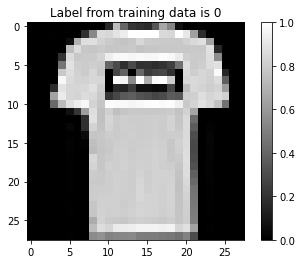

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1].reshape(28,28),cmap='gray')
plt.title(f"Label from training data is {train_labels[1]}")
plt.colorbar()
plt.show()

In [15]:
y_train = tf.keras.utils.to_categorical(train_labels)
y_test = tf.keras.utils.to_categorical(test_labels)

In [16]:
y_train.shape

(60000, 10)

In [17]:
X_val = X_train[50000:,:]
y_val = y_train[50000:,:]
X_train = X_train[:50000,:]
y_train = y_train[:50000,:]

In [19]:
model = tf.keras.Sequential()
from tensorflow.keras.layers import Dense
model.add(Dense(15, activation="relu",input_shape=[784,]))
model.add(Dense(15, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dense_2 (Dense)             (None, 12)                192       
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
Total params: 12,337
Trainable params: 12,337
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="SGD",
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          epochs=100)

Epoch 1/100
1563/1563 [==============================] - 5s 833us/step - loss: 1.1775 - accuracy: 0.5705 - val_loss: 0.7127 - val_accuracy: 0.7401
Epoch 2/100
1563/1563 [==============================] - 1s 722us/step - loss: 0.6296 - accuracy: 0.7772 - val_loss: 0.5912 - val_accuracy: 0.7981
Epoch 3/100
1563/1563 [==============================] - 1s 734us/step - loss: 0.5369 - accuracy: 0.8146 - val_loss: 0.6573 - val_accuracy: 0.7472
Epoch 4/100
1563/1563 [==============================] - 1s 739us/step - loss: 0.4912 - accuracy: 0.8290 - val_loss: 0.5373 - val_accuracy: 0.8170
Epoch 5/100
1563/1563 [==============================] - 1s 721us/step - loss: 0.4631 - accuracy: 0.8382 - val_loss: 0.4767 - val_accuracy: 0.8350
Epoch 6/100
1563/1563 [==============================] - 1s 727us/step - loss: 0.4432 - accuracy: 0.8459 - val_loss: 0.4508 - val_accuracy: 0.8442
Epoch 7/100
1563/1563 [==============================] - 1s 744us/step - loss: 0.4287 - accuracy: 0.8497 - val_loss: 0

1563/1563 [==============================] - 1s 727us/step - loss: 0.2937 - accuracy: 0.8944 - val_loss: 0.4271 - val_accuracy: 0.8508
Epoch 57/100
1563/1563 [==============================] - 1s 730us/step - loss: 0.2936 - accuracy: 0.8953 - val_loss: 0.3893 - val_accuracy: 0.8686
Epoch 58/100
1563/1563 [==============================] - 1s 717us/step - loss: 0.2924 - accuracy: 0.8932 - val_loss: 0.4164 - val_accuracy: 0.8606
Epoch 59/100
1563/1563 [==============================] - 1s 756us/step - loss: 0.2913 - accuracy: 0.8950 - val_loss: 0.4051 - val_accuracy: 0.8618
Epoch 60/100
1563/1563 [==============================] - 1s 746us/step - loss: 0.2902 - accuracy: 0.8951 - val_loss: 0.3905 - val_accuracy: 0.8679
Epoch 61/100
1563/1563 [==============================] - 1s 731us/step - loss: 0.2891 - accuracy: 0.8962 - val_loss: 0.4030 - val_accuracy: 0.8632
Epoch 62/100
1563/1563 [==============================] - 1s 724us/step - loss: 0.2899 - accuracy: 0.8962 - val_loss: 0.4105 

In [25]:
model.compile(optimizer="rmsprop",
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          epochs=100)

Epoch 1/100
1563/1563 [==============================] - 2s 847us/step - loss: 0.3147 - accuracy: 0.8848 - val_loss: 0.4460 - val_accuracy: 0.8569
Epoch 2/100
1563/1563 [==============================] - 1s 790us/step - loss: 0.3150 - accuracy: 0.8872 - val_loss: 0.4721 - val_accuracy: 0.8574
Epoch 3/100
1563/1563 [==============================] - 1s 793us/step - loss: 0.3155 - accuracy: 0.8855 - val_loss: 0.4395 - val_accuracy: 0.8596
Epoch 4/100
1563/1563 [==============================] - 1s 811us/step - loss: 0.3120 - accuracy: 0.8874 - val_loss: 0.4418 - val_accuracy: 0.8569
Epoch 5/100
1563/1563 [==============================] - 1s 797us/step - loss: 0.3095 - accuracy: 0.8884 - val_loss: 0.4346 - val_accuracy: 0.8617
Epoch 6/100
1563/1563 [==============================] - 1s 803us/step - loss: 0.3076 - accuracy: 0.8896 - val_loss: 0.4358 - val_accuracy: 0.8634
Epoch 7/100
1563/1563 [==============================] - 1s 861us/step - loss: 0.3062 - accuracy: 0.8901 - val_loss: 0

1563/1563 [==============================] - 1s 825us/step - loss: 0.2666 - accuracy: 0.9045 - val_loss: 0.5195 - val_accuracy: 0.8493
Epoch 57/100
1563/1563 [==============================] - 1s 813us/step - loss: 0.2697 - accuracy: 0.9047 - val_loss: 0.5046 - val_accuracy: 0.8601
Epoch 58/100
1563/1563 [==============================] - 1s 817us/step - loss: 0.2667 - accuracy: 0.9056 - val_loss: 0.5367 - val_accuracy: 0.8554
Epoch 59/100
1563/1563 [==============================] - 1s 819us/step - loss: 0.2667 - accuracy: 0.9053 - val_loss: 0.5274 - val_accuracy: 0.8619
Epoch 60/100
1563/1563 [==============================] - 1s 813us/step - loss: 0.2638 - accuracy: 0.9063 - val_loss: 0.4890 - val_accuracy: 0.8643
Epoch 61/100
1563/1563 [==============================] - 1s 819us/step - loss: 0.2661 - accuracy: 0.9054 - val_loss: 0.4900 - val_accuracy: 0.8655
Epoch 62/100
1563/1563 [==============================] - 1s 799us/step - loss: 0.2654 - accuracy: 0.9056 - val_loss: 0.5063 